<a href="https://colab.research.google.com/github/Namtk214/K-NN-and-KMeans/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ứng dụng KNN trong bài toán phân loại hoa Iris và cách để tối ưu K

import các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report

Load bộ dataset Iris

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))

Number of classes: 3
Number of data points: 150


Trong bộ data, tiến hành chia phần trăm các dữ liệu test và train

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)
print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


Áp dụng KNN
và tính toán Precision, recall và F1 score...

In [10]:
clf =neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])
print(classification_report(y_test, y_pred ))

Print results for 20 test data points:
Predicted labels:  [1 1 2 1 0 2 0 0 0 0 2 2 1 2 0 2 0 1 1 0]
Ground truth    :  [1 1 2 1 0 2 0 0 0 0 2 2 1 2 0 2 0 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        20
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Giống như trê nhưng sửa lại trọng số weight = distance (Các điểm càng gần nhau thì sẽ có trọng số cao hơn)



In [19]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
#print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=8, weights='distance')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        20
           2       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



Tìm K phù hợp dựa vào khảo sát các giá trị errors


Minimum error:- 0.02 at K = 0


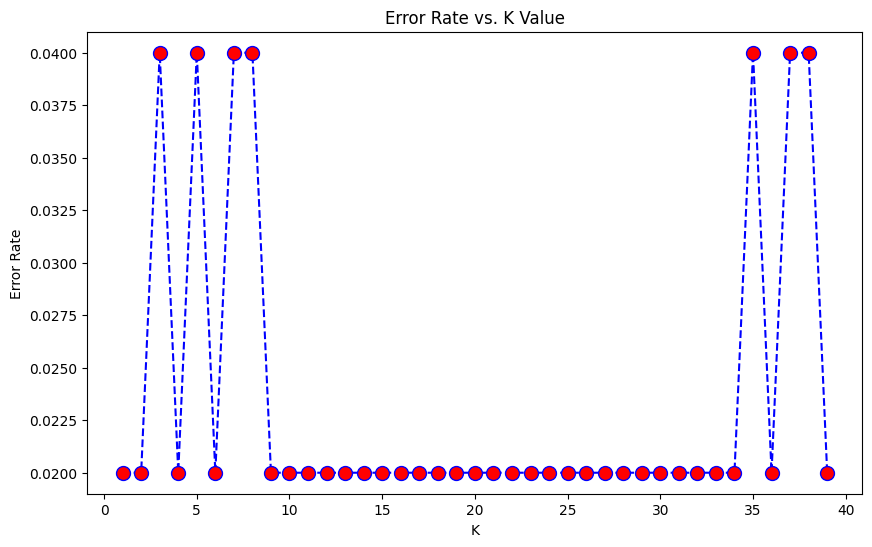

In [13]:
error_rate = []
for i in range(1,40):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights = 'distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.98 at K = 0


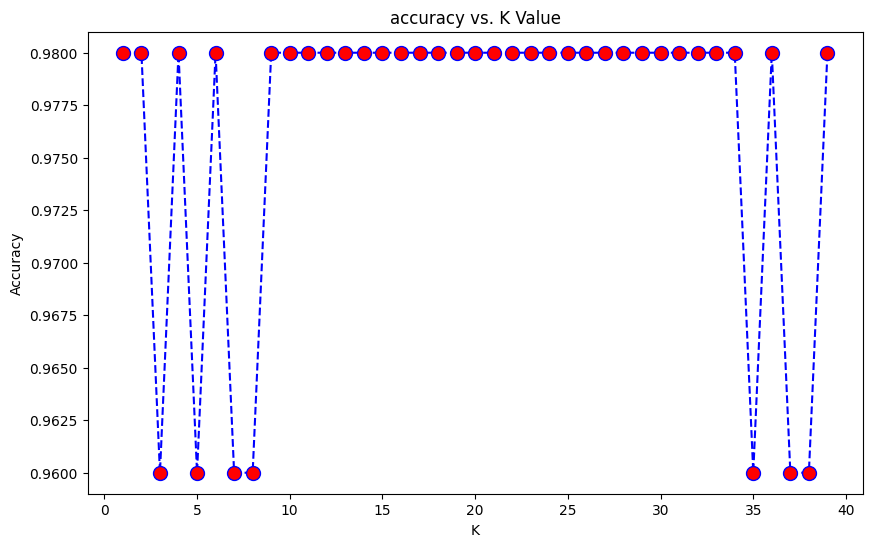

In [14]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i,weights = 'distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Tìm K bằng cross validation


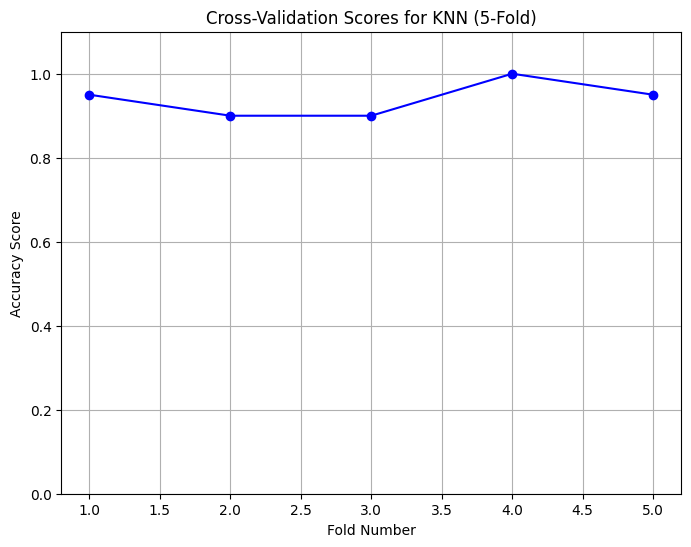

In [22]:
from sklearn import datasets, neighbors
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

# Load dữ liệu Iris
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50, random_state=42)

# Khởi tạo mô hình KNN với 1 láng giềng
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

# Thực hiện cross-validation với 5 phần (5-fold cross-validation)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Vẽ đồ thị cho từng cross-validation score
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for KNN (5-Fold)')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.ylim(0.0, 1.1)
plt.grid(True)
plt.show()
